## Desafio - Módulo 2

In [1]:
# importando as bibliotecas
import pandas as pd  
import numpy as np  
from matplotlib import pyplot as plt  
import seaborn as sns

In [2]:
# carregando os dados
df = pd.read_csv('banknote-authentication.csv', header = None,
                  names = ['variance', 'skewness', 'curtosis', 'entropy', 'class'])

In [3]:
# apresentando as 5 primeiras linhas do dataset
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


#### Qual o tamanho desse dataset (número de linhas, número de colunas)?

In [4]:
# mostrando as dimensões do dataset
df.shape

(1372, 5)

In [5]:
# mostrando as "características" das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [7]:
# analisando as "estatísticas do dataset"
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


#### Qual variável possui o maior *range* (diferença entre valor máximo e mínimo)?

In [8]:
range = df.max() - df.min()
range.sort_values(ascending = False).head(1)

skewness    26.7247
dtype: float64

#### Qual a média da coluna *skewness*?

In [9]:
df[['skewness']].mean()

skewness    1.922353
dtype: float64

#### Qual a média da coluna *entropy*?

In [10]:
df[['entropy']].mean()

entropy   -1.191657
dtype: float64

#### Qual a mediana da coluna *variance*?

In [11]:
df[['variance']].median()

variance    0.49618
dtype: float64

#### Qual a desvio padrão da coluna *curtosis*?

In [12]:
df[['curtosis']].std()

curtosis    4.31003
dtype: float64

#### Qual a porcentagem de exemplos do dataset que são cédulas falsas (*class=1*)?

In [13]:
total = len(df['class'])
falsas = len(df[df['class']==1])
percentual = falsas / total*100
print('O percentual de cédulas falsas é de {0:.2f}%'.format (percentual))

O percentual de cédulas falsas é de 44.46%


#### Qual o valor da correlação de Pearson entre as variáveis *skewness* e *curtosis*?

In [14]:
# matriz de correlação não gráfica
df[['skewness', 'curtosis']].corr()

,skewness,curtosis
skewness,1.000000,-0.786895
curtosis,-0.786895,1.000000


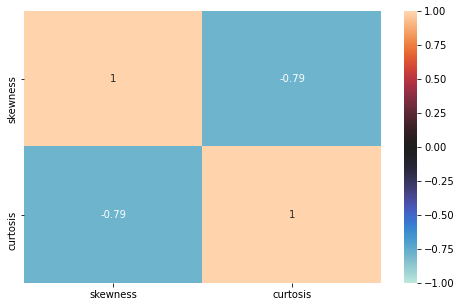

In [15]:
# matriz de correlação gráfica
plt.figure(figsize=(8,5))
matriz_correlacao = df[['skewness', 'curtosis']].corr()
sns.heatmap(matriz_correlacao, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
entrada = df.iloc[:,:-1].values
saida = df.iloc[:, 4].values
x_train, x_test, y_train, y_test = train_test_split(entrada, saida, test_size = 0.30, random_state = 1) 

In [17]:
x_train.shape

(960, 4)

#### Qual a acurácia do *KNN* no conjunto de teste?

### KNN (K-Nearest Neighbors)

In [18]:
# aplicando um modelo de classificação via KNN
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors = 5)
clf_KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [19]:
# realiza a previsão para o KNN
y_pred_KNN = clf_KNN.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_pred_KNN)
print('Acurácia do KNN: ', acuracia)

Acurácia do KNN:  0.9975728155339806


In [21]:
# contrução da matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix
matriz_confusao = confusion_matrix(y_test, y_pred_KNN)
print(matriz_confusao)

[[234   1]
 [  0 177]]


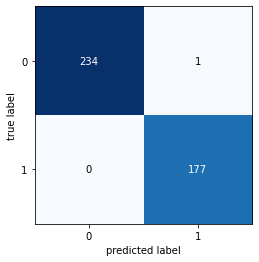

In [22]:
# realiza o plot da matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

In [23]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       0.99      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



#### Qual a acurácia da *Árvore de Decisão* no conjunto de teste?

### Árvore de Decisão

In [24]:
# aplicando um modelo de classificação via árvore de decisão
from sklearn.tree import DecisionTreeClassifier
clf_arvore = DecisionTreeClassifier(random_state = 1) 
clf_arvore.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [25]:
# realiza a previsão com os dados
y_pred_arvore = clf_arvore.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_pred_arvore)
print('Acurácia da Árvore de Decisão: ', acuracia)

Acurácia da Árvore de Decisão:  0.9878640776699029


In [27]:
# contrução da matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix
matriz_confusao = confusion_matrix(y_test, y_pred_arvore)
print(matriz_confusao)

[[231   4]
 [  1 176]]


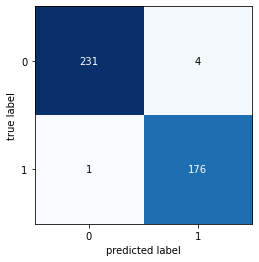

In [28]:
# realiza o plot da matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

In [29]:
print(classification_report(y_test, y_pred_arvore))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       235
           1       0.98      0.99      0.99       177

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



#### Qual a acurácia do *Random Forest* no conjunto de teste?

### Floresta Randômica

In [30]:
# aplicando um modelo de classificação via floresta randômica
from sklearn.ensemble import RandomForestClassifier
clf_floresta = RandomForestClassifier(max_depth = 8, random_state = 1) 
clf_floresta.fit(x_train, y_train) 

RandomForestClassifier(max_depth=8, random_state=1)

In [31]:
# realiza a previsão
y_pred_floresta = clf_floresta.predict(x_test) 

In [32]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_pred_floresta)
print('Acurácia da Floresta Randômica: ', acuracia)

Acurácia da Floresta Randômica:  0.9951456310679612


In [33]:
# contrução da matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix
matriz_confusao = confusion_matrix(y_test, y_pred_floresta)
print(matriz_confusao)

[[233   2]
 [  0 177]]


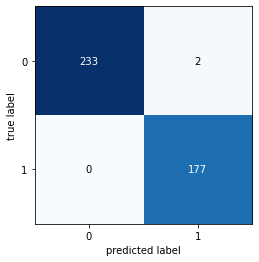

In [34]:
# realiza o plot da matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

In [35]:
print(classification_report(y_test, y_pred_floresta))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       235
           1       0.99      1.00      0.99       177

    accuracy                           1.00       412
   macro avg       0.99      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



#### Analisando o valor da importância relativa das features do *Random Forest* (atributo feature_importances_), qual *feature* melhor contribuiu para a predição de *class*?

In [36]:
feature = clf_floresta.feature_importances_.argmax()
df.columns[feature]

'variance'

#### Qual o valor da importância relativa da feature *skewness*?

In [37]:
feature = (df.columns == 'skewness').argmax()
clf_floresta.feature_importances_[feature]

0.24058588894949182

#### Qual a acurácia do *SVM* no conjunto de teste?

### SVM (Support Vector Machine)

In [38]:
# aplicando um modelo de classificação via SVM
from sklearn.svm import SVC
clf_svm = SVC(gamma = 'auto', kernel = 'rbf', random_state = 1)
clf_svm.fit(x_train, y_train) 

SVC(gamma='auto', random_state=1)

In [39]:
# realiza a previsão
y_pred_svm = clf_svm.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_pred_svm)
print('Acurácia do SVM: ', acuracia)

Acurácia do SVM:  1.0


In [41]:
# contrução da matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix
matriz_confusao = confusion_matrix(y_test, y_pred_svm)
print(matriz_confusao)

[[235   0]
 [  0 177]]


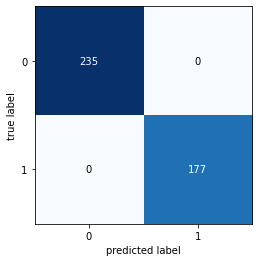

In [42]:
# realiza o plot da matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

In [43]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



#### Qual a acurácia da rede *MLP* no conjunto de teste?

### MLP (Multilayer Perceptron)

In [44]:
# aplicando um modelo de classificação via MLP
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = (2, ), random_state = 1)
clf_mlp.fit(x_train, y_train) 

MLPClassifier(hidden_layer_sizes=(2,), random_state=1, solver='lbfgs')

In [45]:
# realiza a previsão
y_pred_mlp = clf_mlp.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_pred_mlp)
print('Acurácia do MLP: ', acuracia)

Acurácia do MLP:  1.0


In [47]:
# contrução da matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix
matriz_confusao = confusion_matrix(y_test, y_pred_mlp)
print(matriz_confusao)

[[235   0]
 [  0 177]]


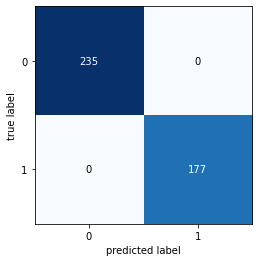

In [48]:
# realiza o plot da matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

In [49]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

